In [70]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
from pycaret.classification import *

from sklearn.feature_extraction.text import CountVectorizer

In [71]:
df = pd.read_csv('data.csv')

In [72]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:
tf_vectorizer = CountVectorizer()

In [73]:
features = tf_vectorizer.fit_transform(df['summary'].apply(lambda features : np.str_(features)))

In [74]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [75]:
print("Vocabulary: ", tf_vectorizer.vocabulary_)

Vocabulary:  {'pretty': 878, 'good': 482, 'story': 1067, 'very': 1208, 'book': 129, 'five': 433, 'stars': 1060, 'western': 1241, 'fast': 406, 'read': 911, 'entertaining': 356, 'like': 670, '1930s': 4, 'movie': 749, 'another': 53, 'get': 468, 'it': 603, 'thrackan': 1120, 'my': 755, 'collection': 200, 'really': 920, 'hate': 511, 'books': 130, 'one': 806, 'huge': 553, 'chapter': 178, 'minor': 736, 'new': 767, 'jedi': 612, 'order': 811, 'side': 1003, 'short': 997, 'stories': 1066, 'old': 802, 'fashion': 405, 'entertainment': 357, 'typical': 1167, 'amour': 49, 'tumbling': 1157, 'louis': 689, 'just': 619, 'plain': 852, 'all': 38, 'of': 797, 'his': 533, 'the': 1108, 'fury': 460, 'woman': 1263, 'scorned': 976, 'des': 278, 'troy': 1153, 'game': 462, 'hades': 500, 'daughter': 261, 'interesting': 589, 'plot': 857, 'salute': 963, 'those': 1118, 'you': 1291, 'who': 1250, 'soldiered': 1031, 'through': 1124, '592': 11, 'pages': 825, 'australian': 78, 'sf': 990, 'reader': 912, 'he': 515, 'ever': 367, 

In [76]:
features_df.head(5)

,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,yay,yet,yiddish,york,you,young,your,yourself,yuk,zardoz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df = pd.concat([features_df,df['actual_ratings']],axis=1)

In [78]:
df.head(5)

,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,yet,yiddish,york,you,young,your,yourself,yuk,zardoz,actual_ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [79]:
new_df = df.drop(df.index[df['actual_ratings'] == 3])

In [80]:
new_df.loc[(df['actual_ratings'] == 4) | (new_df['actual_ratings'] == 5), 'derived_ratings'] = 'positive'
new_df.loc[(df['actual_ratings'] == 1) | (new_df['actual_ratings'] == 2), 'derived_ratings'] = 'negative'
new_df.drop(['actual_ratings'], axis=1, inplace=True)


In [100]:
#Shuffle your dataset 
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.9 * len(new_df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [101]:
numerical_features = list(features_df.columns)
new_clf = setup(data = new_train_df, target = 'derived_ratings',numeric_features=numerical_features, use_gpu=True)


#new_clf=setup(data=new_train_df,target='derived_ratings')

,Description,Value
0,session_id,4748
1,Target,derived_ratings
2,Target Type,Binary
3,Label Encoded,"negative: 0, positive: 1"
4,Original Data,"(751, 1298)"
5,Missing Values,False
6,Numeric Features,1297
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [102]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8552,0.8066,0.9865,0.8631,0.9206,0.1295,0.1882,0.0410
gbc,Gradient Boosting Classifier,0.8552,0.7103,0.9843,0.8647,0.9205,0.1426,0.1834,0.3900
dummy,Dummy Classifier,0.8515,0.5000,1.0000,0.8515,0.9198,0.0000,0.0000,0.0080
svm,SVM - Linear Kernel,0.8494,0.0000,0.9483,0.8836,0.9145,0.2809,0.3008,0.0310
ridge,Ridge Classifier,0.8475,0.0000,0.9618,0.8729,0.9147,0.1961,0.2312,0.0250
ada,Ada Boost Classifier,0.8438,0.7168,0.9596,0.8704,0.9125,0.1844,0.2251,0.2210
lightgbm,Light Gradient Boosting Machine,0.8419,0.6738,0.9888,0.8500,0.9141,-0.0175,-0.0292,0.1070
rf,Random Forest Classifier,0.8249,0.7853,0.8862,0.9064,0.8958,0.3438,0.3464,0.6490
et,Extra Trees Classifier,0.8134,0.7768,0.8725,0.9052,0.8880,0.3220,0.3262,0.6610
dt,Decision Tree Classifier,0.7865,0.6631,0.8388,0.9039,0.8693,0.2837,0.2921,0.0620


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4748, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
K_FOLDS = 5
top_model = compare_models(sort='F1',
                           fold=K_FOLDS,
                           n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8721,0.7055,0.9920,0.8751,0.9298,0.2402,0.3329,0.6340
knn,K Neighbors Classifier,0.8630,0.6465,0.9973,0.8638,0.9256,0.1131,0.1512,0.3440
et,Extra Trees Classifier,0.8629,0.7293,0.9786,0.8758,0.9240,0.2337,0.3137,0.6300
lr,Logistic Regression,0.8584,0.7683,0.9866,0.8664,0.9224,0.1393,0.1853,0.0420
ridge,Ridge Classifier,0.8606,0.0000,0.9652,0.8828,0.9217,0.2837,0.3330,0.0260
dummy,Dummy Classifier,0.8539,0.5000,1.0000,0.8539,0.9212,0.0000,0.0000,0.0080
lightgbm,Light Gradient Boosting Machine,0.8516,0.6361,0.9973,0.8536,0.9199,-0.0043,-0.0089,0.1060
gbc,Gradient Boosting Classifier,0.8493,0.6063,0.9679,0.8704,0.9163,0.1710,0.2315,0.2920
dt,Decision Tree Classifier,0.8447,0.5985,0.9465,0.8807,0.9123,0.2396,0.2583,0.0420
svm,SVM - Linear Kernel,0.8446,0.0000,0.9466,0.8810,0.9120,0.2372,0.2538,0.0280


In [103]:
top_model

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=785, verbose=0,
                        warm_start=False),
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0

In [104]:
tuned_model = tune_model(top_model[1], optimize='F1',
                         choose_better=True, fold=K_FOLDS);

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.8156,1.0000,0.8654,0.9278,0.1091,0.2402
1,0.8762,0.7404,1.0000,0.8738,0.9326,0.2087,0.3413
2,0.8667,0.7240,1.0000,0.8641,0.9271,0.1950,0.3286
3,0.8762,0.7598,1.0000,0.8725,0.9319,0.2812,0.4045
4,0.8762,0.7904,1.0000,0.8725,0.9319,0.2812,0.4045
Mean,0.8724,0.7660,1.0000,0.8697,0.9303,0.2150,0.3438
Std,0.0047,0.0332,0.0000,0.0041,0.0023,0.0639,0.0606


In [105]:
tuned_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='distance')

In [106]:
bagged_model = ensemble_model(tuned_model, optimize="F1",
                              fold=K_FOLDS) 

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8667,0.7741,1.0000,0.8654,0.9278,0.1091,0.2402
1,0.8667,0.7285,1.0000,0.8654,0.9278,0.1091,0.2402
2,0.8667,0.6517,1.0000,0.8641,0.9271,0.1950,0.3286
3,0.8762,0.7805,1.0000,0.8725,0.9319,0.2812,0.4045
4,0.8762,0.7893,1.0000,0.8725,0.9319,0.2812,0.4045
Mean,0.8705,0.7448,1.0000,0.8680,0.9293,0.1951,0.3236
Std,0.0047,0.0511,0.0000,0.0038,0.0021,0.0770,0.0735


In [107]:
best_model = bagged_model
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8850,0.7582,0.9898,0.8899,0.9372,0.2753,0.3485


In [108]:
plot_model(best_model, plot="parameter")

,Parameters
base_estimator,"KNeighborsClassifier(algorithm='auto', leaf_si..."
bootstrap,True
bootstrap_features,False
max_features,1.0
max_samples,1.0
n_estimators,10
n_jobs,1
oob_score,False
random_state,4748
verbose,0


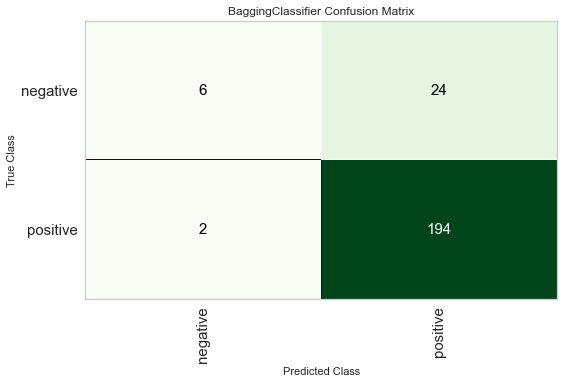

In [109]:
plot_model(best_model, plot="confusion_matrix")

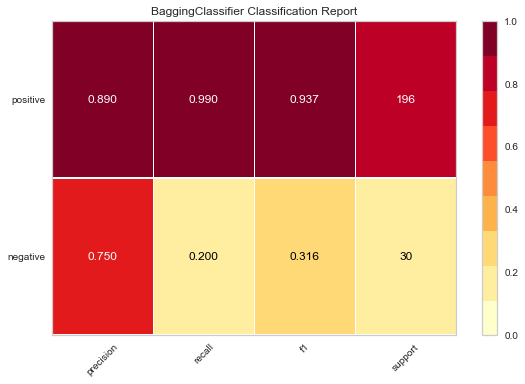

In [110]:
plot_model(best_model, plot="class_report")

In [111]:
final_model = finalize_model(best_model)

In [112]:
predict_model(final_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9867,0.9965,0.9949,0.9898,0.9924,0.9415,0.9417


In [113]:
predict_unseen = predict_model(final_model, data=new_test_df);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0,0.8926,0,0,0,0,0


In [114]:
predict_unseen

,00,101,14,1864,1930s,1st,2003,2008,21th,2weeks,...,york,you,young,your,yourself,yuk,zardoz,derived_ratings,Label,Score
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9788
516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.9677
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.7653
559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,negative,negative,1.0000
583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.8249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.7061
431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,1.0000
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.6307
582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,positive,positive,0.8265


In [38]:
save_model(final_model,"deployment_04072022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['00', '101', '14',
                                                           '1864', '1930s',
                                                           '1st', '2003', '2008',
                                                           '21th', '2weeks',
                                                           '30', '592', '85',
                                                           '99', 'ab',
                                                           'abagnale',
                                                           'abbreviated',
                                                           'about', 'above',
